In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [2]:
def cleanData(filePath, filePathJson, encoding):
    data = pd.read_csv(filePath, encoding=encoding)
    data['trending_date'] = '20' + data['trending_date']
    data['trending_date'] = pd.to_datetime(data['trending_date'],format='%Y.%d.%m')
    data['publish_time'] = data['publish_time'].replace(regex=True,to_replace=r"T.*",value=r'')
    data['publish_time'] = pd.to_datetime(data['publish_time'],format='%Y-%m-%d', errors='coerce')
    categories = pd.read_json(filePathJson)
    catData = json_normalize(categories['items'])
    idToCategories = pd.DataFrame(columns=['category_id', 'category'])
    idToCategories['category_id'] = catData['id']
    idToCategories['category'] = catData['snippet.title']
    idToCategories['category_id'] = idToCategories['category_id'].astype('int64')
    myData = pd.merge(data, idToCategories)
    myData = myData.drop(columns='category_id')
    myData['tags'] = myData.tags.str.strip().str.lower().str.replace('"','').str.replace('|',',')
    myData = myData.drop_duplicates()
    return myData

def allParcableCountryData():
    us = cleanData('../Data/Youtube/USvideos.csv', '../Data/Youtube/US_category_id.json', "latin_1")
    mx=  cleanData('../Data/Youtube/MXvideos.csv', '../Data/Youtube/MX_category_id.json', "latin_1")
    ca=  cleanData('../Data/Youtube/CAvideos.csv', '../Data/Youtube/CA_category_id.json', "latin_1")
    de=  cleanData('../Data/Youtube/DEvideos.csv', '../Data/Youtube/DE_category_id.json', "latin_1")
    gb=  cleanData('../Data/Youtube/GBvideos.csv', '../Data/Youtube/GB_category_id.json', "latin_1")
    ind= cleanData('../Data/Youtube/INvideos.csv', '../Data/Youtube/IN_category_id.json', "latin_1")
    fr=  cleanData('../Data/Youtube/FRvideos.csv', '../Data/Youtube/FR_category_id.json', "latin_1")
    us["country"] = "us"
    mx["country"] = "mx"
    ca["country"] = "ca"
    de["country"] = "de"
    gb["country"] = "gb"
    ind["country"] = "in"
    fr["country"] = "fr"
    data = us.append([mx,ca,de,gb,ind,fr])
    return data

In [4]:
allData = allParcableCountryData()

In [5]:
groupedData = allData.groupby('country')

Text(0.5, 1.0, 'Number of views by country')

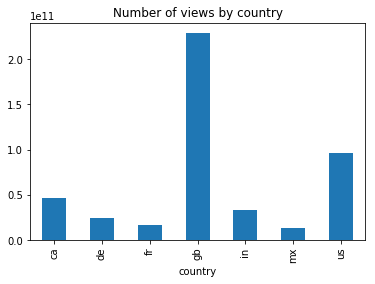

In [16]:
groupedData.views.sum().plot.bar()
plt.title('Number of views by country')

Text(0.5, 1.0, 'Number of likes by country')

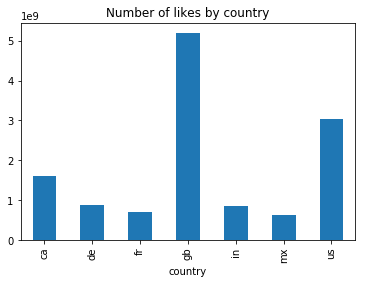

In [33]:
groupedData.likes.sum().plot.bar()
plt.title('Number of likes by country')

Text(0.5, 1.0, 'Number of dislikes by country')

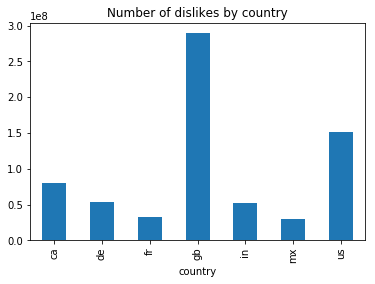

In [21]:
groupedData.dislikes.sum().plot.bar()
plt.title('Number of dislikes by country')

Text(0.5, 1.0, 'Number of entries by country')

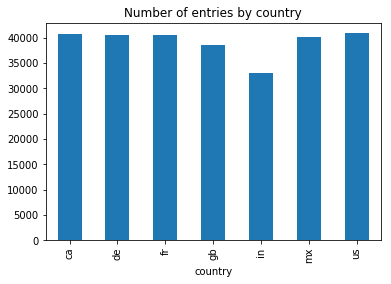

In [24]:
groupedData.count().title.plot.bar()
plt.title('Number of entries by country')

Text(0.5, 1.0, 'Number of comment count by country')

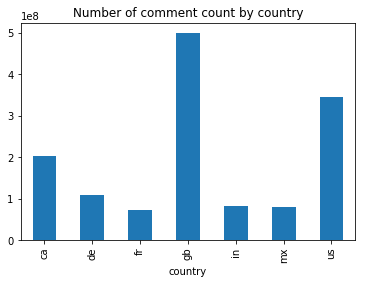

In [26]:
groupedData.comment_count.sum().plot.bar()
plt.title('Number of comment count by country')